In [6]:
import cv2
import image_similarity_measures
from image_similarity_measures.quality_metrics import rmse, psnr, ssim

In [ ]:
def match_size(imgA, imgB):
    tf = tempfile.NamedTemporaryFile(suffix='.jpg')
    
    # which one have more pixels?
    pxA = imgA.size[0]*imgA.size[1]
    pxB = imgB.size[0]*imgB.size[1]
    
    # handle odd pixel size
    print('W/H= ' + str(imgA.size[0]) + '/' + str(imgA.size[1]))
    print('W/H= ' + str(imgB.size[0]) + '/' + str(imgB.size[1]))

    if(pxA < pxB):
        #print('resize imgB to match imgA')
        # save temp file imgB
        imgB.save(tf.name)
        imgRes = resize_and_crop(
                        tf.name, 
                        (imgA.size[0],imgA.size[1]), #set width and height to match img1
                        crop_origin="top"
                        )
        del tf
        return imgRes, imgA
    else:
        #print('resize imgA to match imgB')
        # save temp file imgB
        imgA.save(tf.name)
        imgRes = resize_and_crop(
                        tf.name, 
                        (imgB.size[0],imgB.size[1]), #set width and height to match img1
                        crop_origin="top"
                        )
        del tf
        return imgRes, imgB

In [12]:
in_img1 = cv2.imread('test-1.jpg')
in_img2 = cv2.imread('test-2.jpg')

out_rmse = rmse(in_img1, in_img2)
out_psnr = psnr(in_img1, in_img2)
out_ssim = ssim(in_img1, in_img2)


print(out_rmse)
print(out_psnr)
print(out_ssim)


# image-similarity-measures --query_image=test-1.jpeg --data_image=test-2.jpeg --metric=all

0.011658429
38.66719964673953
0.9251680830041885


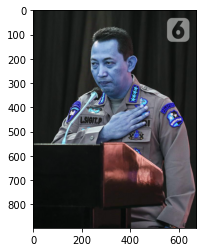

In [14]:
import numpy as np
import urllib.request as rq
import cv2
from matplotlib import pyplot as plt

# load image from url
def urlToImage(url):
    # download image,convert to a NumPy array,and read it into opencv
    resp = rq.urlopen(url)
    img = np.asarray(bytearray(resp.read()),dtype="uint8")
    img = cv2.imdecode(img,cv2.IMREAD_COLOR)

    #return the image
    return img
img = urlToImage("https://cekmedsos.com/uploads/twimg/60b5245f08ec6.jpg")
plt.imshow(img)